In [1]:
import numpy as np
import pandas as pd 

In [3]:
# Load the dataset
df = pd.read_csv('LinkedIn people profiles datasets.csv')

# Display the first few rows of the dataframe
df.head()

,timestamp,id,name,city,country_code,region,current_company:company_id,current_company:name,position,following,...,people_also_viewed,educations_details,education,avatar,languages,certifications,recommendations,recommendations_count,volunteer_experience,сourses
0,2023-01-10,catherinemcilkenny,"Catherine Fitzpatrick (McIlkenny), B.A",Canada,CA,NaN,NaN,NaN,Snr Business Analyst at Emploi et Développemen...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/l...",Queen's University Belfast,"[{""degree"":""Bachelor of Arts (B.A.) Honours"",""...",https://media.licdn.com/dms/image/C4E03AQEcz_j...,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-17,margot-bon-51a04624,Margot Bon,"The Randstad, Netherlands",NL,EU,gemeente-utrecht,Gemeente Utrecht,Communicatieadviseur Corporate & Strategie Gem...,NaN,...,"[{""profile_link"":""https://nl.linkedin.com/in/j...",NaN,"[{""degree"":""Scrum en Agile werken"",""end_year"":...",https://static.licdn.com/sc/h/244xhbkr7g40x6bs...,"[{""subtitle"":""Professional working proficiency...","[{""meta"":""Issued Jun 2013"",""subtitle"":""Van der...",Menno H. Poort “Ik werk al jaren prettig met M...,2.0,"[{""cause"":"""",""duration"":""Sep 2010 Jul 2020 9 y...",NaN
2,2023-05-17,mike-dean-8509a193,Mike Dean,"England, United Kingdom",UK,NaN,network-rail,Network Rail,Network Data Manager at Network Rail,NaN,...,"[{""profile_link"":""https://uk.linkedin.com/in/g...",Brighton Polytechnic,"[{""degree"":""2:2"",""end_year"":""1991"",""field"":""El...",https://media.licdn.com/dms/image/C4D03AQHLj-Z...,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-29,giovanna-panarella-99a0a4167,Giovanna Panarella,"Avellino, Campania, Italy",IT,EU,NaN,Freelance,Architetto (Freelance),500.0,...,"[{""profile_link"":""https://it.linkedin.com/in/e...",Università di Camerino,"[{""degree"":""“Corso di aggiornamento profession...",https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN,NaN,NaN,NaN,"[{""cause"":""Arts and Culture"",""duration"":""Jan 2...",NaN
4,2022-12-06,steve-latimer-3364327,Steve Latimer,"Ontario, Canada",CA,NaN,mid-range-computer-group-inc.,Mid-Range Computer Group Inc.,Senior Account Executive at Mid-Range Computer...,NaN,...,"[{""profile_link"":""https://ca.linkedin.com/in/d...",St. Michael's College School,"[{""degree"":"""",""end_year"":""1978"",""field"":"""",""me...",NaN,NaN,"[{""meta"":""Issued Jan 2022 See credential"",""sub...","Blake Reeves “If I was a customer, I would wan...",1.0,NaN,NaN


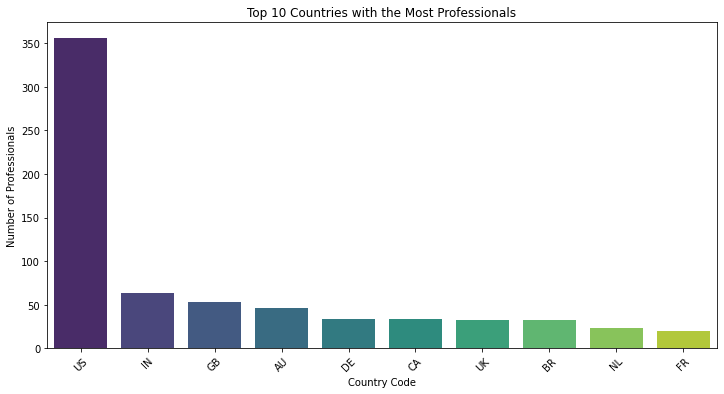

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where 'country_code' is NaN
df_country = df.dropna(subset=['country_code'])

# Get the top 10 countries with the most professionals
top_countries = df_country['country_code'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with the Most Professionals')
plt.xlabel('Country Code')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=45)
plt.show()

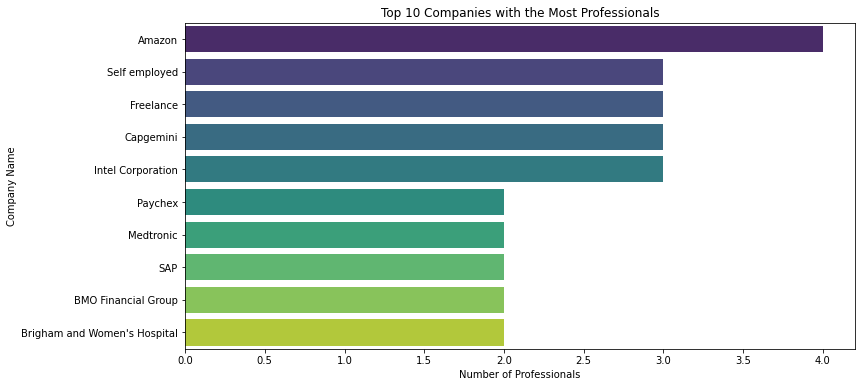

In [5]:
# Drop rows where 'current_company:name' is NaN
df_company = df.dropna(subset=['current_company:name'])

# Get the top 10 companies with the most professionals
top_companies = df_company['current_company:name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_companies.index, x=top_companies.values, palette='viridis')
plt.title('Top 10 Companies with the Most Professionals')
plt.xlabel('Number of Professionals')
plt.ylabel('Company Name')
plt.show()

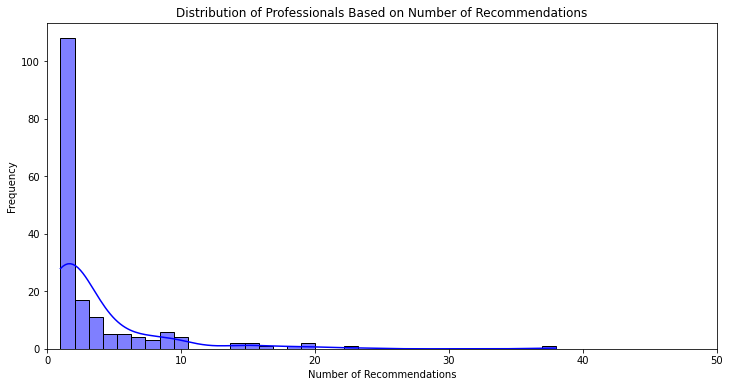

In [6]:
# Drop rows where 'recommendations_count' is NaN
df_recommendations = df.dropna(subset=['recommendations_count'])

plt.figure(figsize=(12, 6))
sns.histplot(df_recommendations['recommendations_count'], kde=True, color='b')
plt.title('Distribution of Professionals Based on Number of Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Limit x-axis to 50 as there are some outliers with a very high number of recommendations
plt.show()

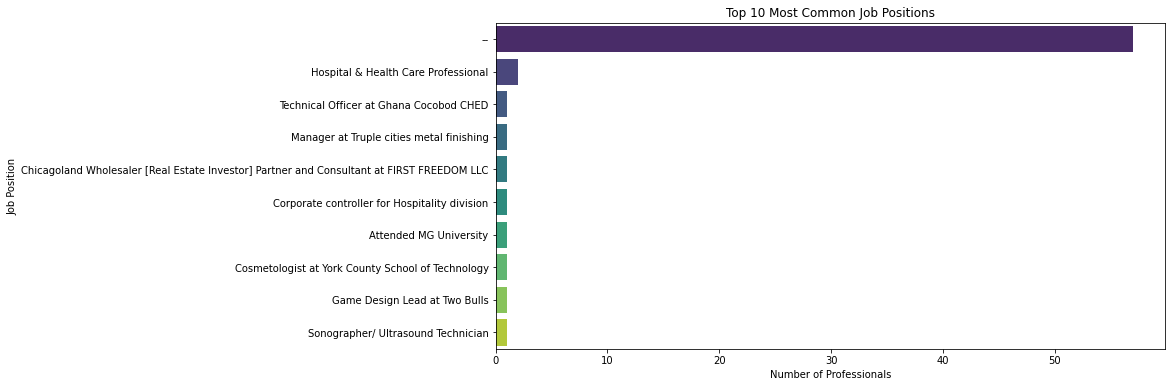

In [7]:
# Drop rows where 'position' is NaN
df_position = df.dropna(subset=['position'])

# Get the top 10 most common job positions
top_positions = df_position['position'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_positions.index, x=top_positions.values, palette='viridis')
plt.title('Top 10 Most Common Job Positions')
plt.xlabel('Number of Professionals')
plt.ylabel('Job Position')
plt.show()

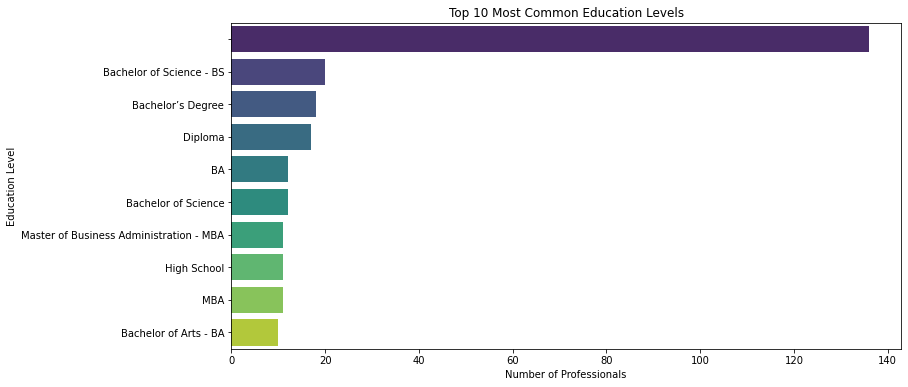

In [8]:
import json

# Drop rows where 'education' is NaN
df_education = df.dropna(subset=['education'])

# Function to extract education levels from 'education' column
def extract_education_levels(education_str):
    try:
        education_list = json.loads(education_str.replace("'", '"'))
        return [edu['degree'] for edu in education_list if 'degree' in edu]
    except:
        return []

# Extract education levels and create a list of all education levels
all_education_levels = []
for education_str in df_education['education']:
    all_education_levels.extend(extract_education_levels(education_str))

# Get the top 10 most common education levels
top_education_levels = pd.Series(all_education_levels).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_education_levels.index, x=top_education_levels.values, palette='viridis')
plt.title('Top 10 Most Common Education Levels')
plt.xlabel('Number of Professionals')
plt.ylabel('Education Level')
plt.show()

Summary Statistics:
        following  recommendations_count
count  481.000000             173.000000
mean   144.241164               3.670520
std    169.527407               4.797177
min      1.000000               1.000000
25%     12.000000               1.000000
50%     57.000000               2.000000
75%    226.000000               4.000000
max    617.000000              38.000000


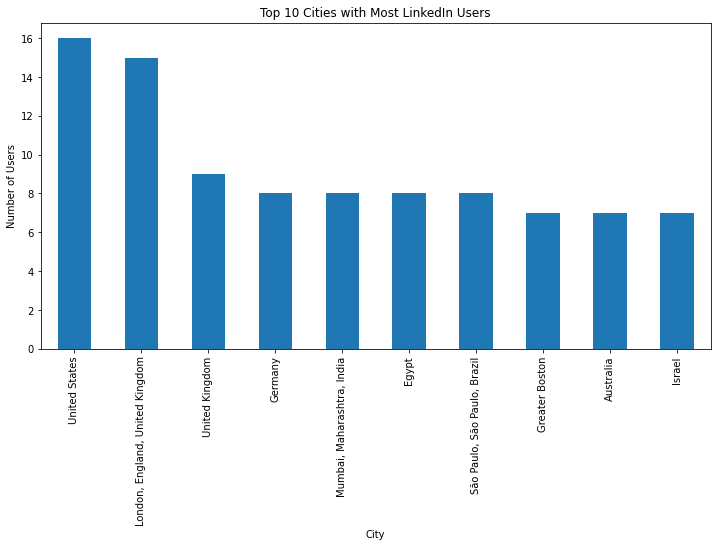

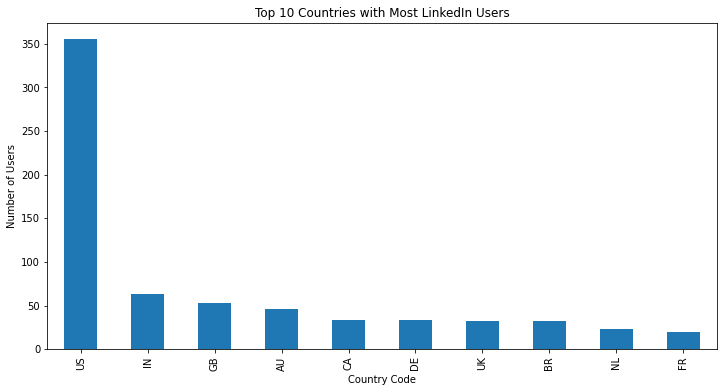

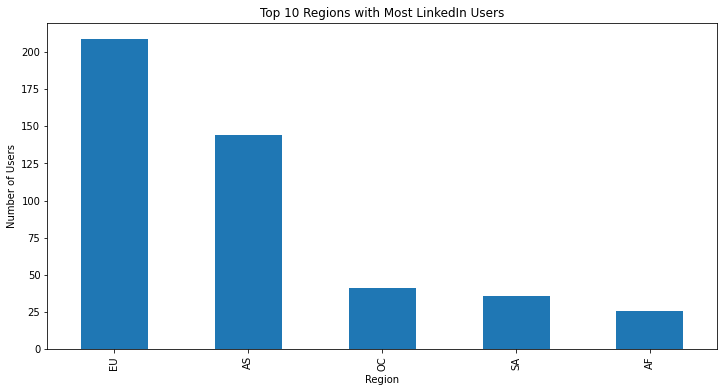

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the LinkedIn user data from a CSV file
data = pd.read_csv('LinkedIn people profiles datasets.csv')

# Basic statistics and information about the dataset
print("Summary Statistics:")
print(data.describe())

# Distribution of users by city
city_counts = data['city'].value_counts()
plt.figure(figsize=(12, 6))
city_counts.head(10).plot(kind='bar', title='Top 10 Cities with Most LinkedIn Users')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.show()

# Distribution of users by country
country_counts = data['country_code'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar', title='Top 10 Countries with Most LinkedIn Users')
plt.xlabel('Country Code')
plt.ylabel('Number of Users')
plt.show()

# Distribution of users by region
region_counts = data['region'].value_counts()
plt.figure(figsize=(12, 6))
region_counts.head(10).plot(kind='bar', title='Top 10 Regions with Most LinkedIn Users')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.show()


In [ ]:
https://www.kaggle.com/code/rajatraj0502/linkedin-professional-profiles-dataset

In [ ]:
# Drop rows where 'current_company:name' is NaN
df_company = df.dropna(subset=['current_company:name'])

# Get the top 10 companies with the most professionals
top_companies = df_company['current_company:name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar', title='Top 10 Countries with Most LinkedIn Users')
sns.barplot(y=top_companies.index, x=top_companies.values, palette='viridis')
plt.title('Top 10 Companies with the Most Professionals')
plt.xlabel('Number of Professionals')
plt.ylabel('Company Name')
plt.show()